In [2]:
import numpy as np
import random as rd
import pandas as pd
import statsmodels.formula.api as smf
import itertools
from scipy import stats as scs
from matplotlib import pyplot as plt

In [3]:

df = pd.read_csv('data.csv', sep=';')
df = df.head(81)
n = df.shape[0]
points = np.array([df['X1'].to_numpy(),
           df['X2'].to_numpy(),
           df['X3'].to_numpy(),
           df['X4'].to_numpy()])
x = points.T
y = df['y'].to_numpy()


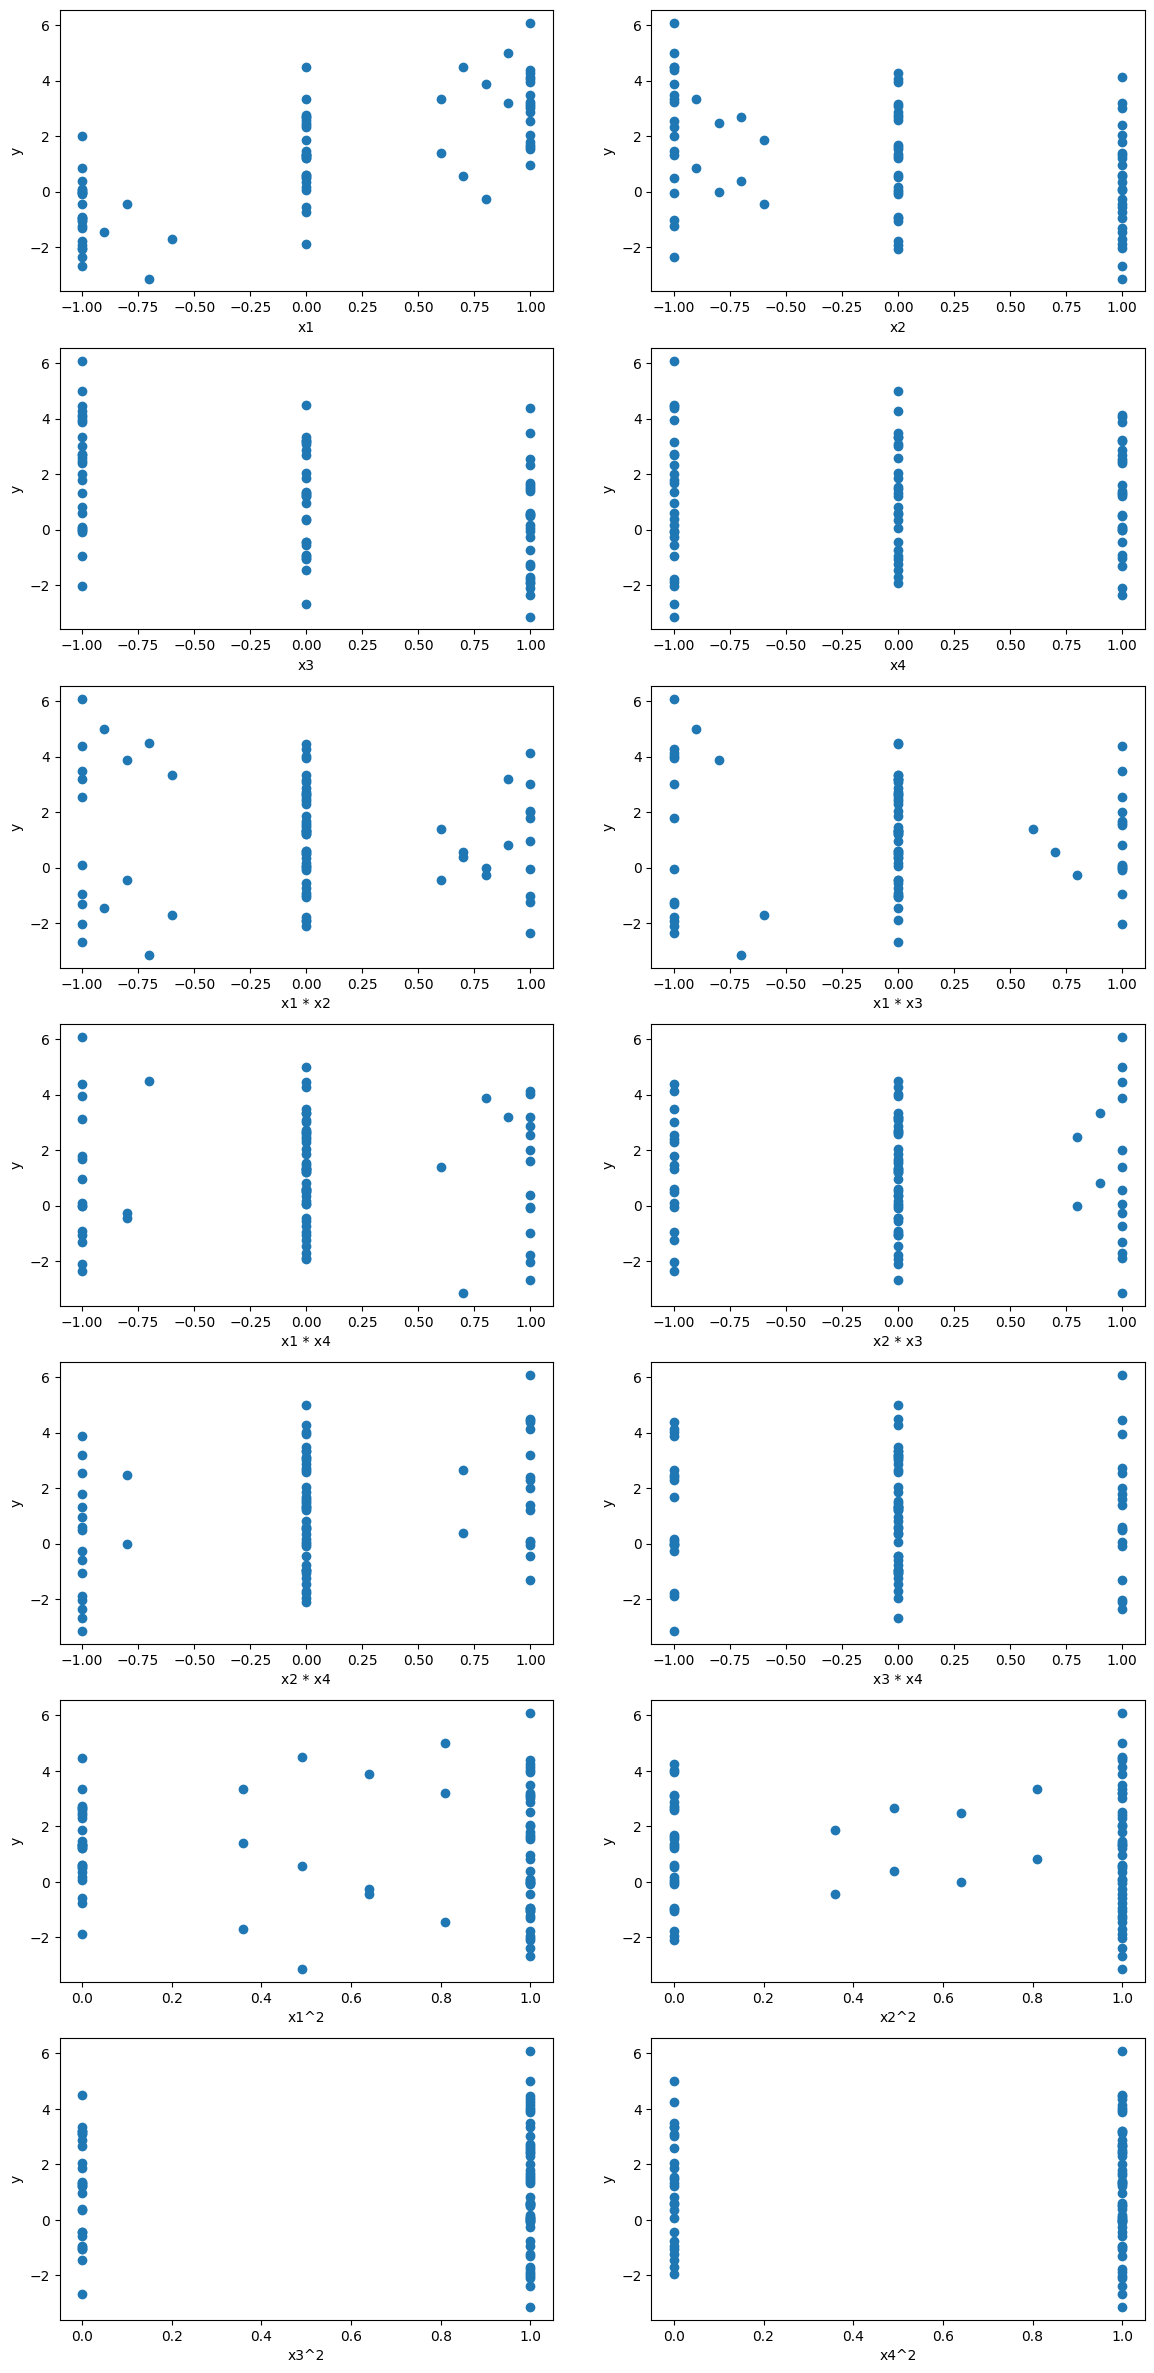

In [4]:
fig, axs = plt.subplots(7, 2)
fig.set_figwidth(14)
fig.set_figheight(30)
axs[0, 0].scatter(df['X1'], df['y'])
axs[0, 0].set_xlabel('x1')

axs[0, 1].scatter(df['X2'], df['y'])
axs[0, 1].set_xlabel('x2')

axs[1, 0].scatter(df['X3'], df['y'])
axs[1, 0].set_xlabel('x3')

axs[1, 1].scatter(df['X4'], df['y'])
axs[1, 1].set_xlabel('x4')

axs[2, 0].scatter(df['X1'] * df['X2'], df['y'])
axs[2, 0].set_xlabel('x1 * x2')

axs[2, 1].scatter(df['X1'] * df['X3'], df['y'])
axs[2, 1].set_xlabel('x1 * x3')

axs[3, 0].scatter(df['X1'] * df['X4'], df['y'])
axs[3, 0].set_xlabel('x1 * x4')

axs[3, 1].scatter(df['X2'] * df['X3'], df['y'])
axs[3, 1].set_xlabel('x2 * x3')

axs[4, 0].scatter(df['X2'] * df['X4'], df['y'])
axs[4, 0].set_xlabel('x2 * x4')

axs[4, 1].scatter(df['X3'] * df['X4'], df['y'])
axs[4, 1].set_xlabel('x3 * x4')

axs[5, 0].scatter(df['X1']**2, df['y'])
axs[5, 0].set_xlabel('x1^2')

axs[5, 1].scatter(df['X2']**2, df['y'])
axs[5, 1].set_xlabel('x2^2')

axs[6, 0].scatter(df['X3']**2, df['y'])
axs[6, 0].set_xlabel('x3^2')

axs[6, 1].scatter(df['X4']**2, df['y'])
axs[6, 1].set_xlabel('x4^2')



for i, j in itertools.product(range(axs.shape[0]), range(axs.shape[1])) :
    axs[i, j].set_ylabel('y')

Определитель информационной матрицы

In [5]:
xTx = np.dot(x.T, x)
matrix_determ = np.linalg.det(xTx/np.trace(xTx))
print('\n1. Определитель информационной матрицы, нормированной на след: \n', matrix_determ)


1. Определитель информационной матрицы, нормированной на след: 
 0.003891297747343401


Минимальное и максимальное собственное число матрицы

In [6]:
lambda_min = np.amin(np.linalg.eigvals(xTx))
lambda_max = np.amax(np.linalg.eigvals(xTx))
print('\n2. Минимальное собственное число матрицы: \n', lambda_min)
print('\n3. Мера обусловленности матрицы по Нейману-Голдстейну: \n', lambda_max / lambda_min)


2. Минимальное собственное число матрицы: 
 48.880466968494076

3. Мера обусловленности матрицы по Нейману-Голдстейну: 
 1.1070646225536431


Матрица сопряженности

In [7]:
m = x.shape[1]
R = np.ones((m, m))
max_pair_conj = 0


for i in range(m):
    for j in range(m):
        if (i != j):
            R[i][j] = np.dot(points[i], points[j]) / (np.linalg.norm(points[i]) * np.linalg.norm(points[j]))
            if (np.abs(R[i][j]) > max_pair_conj):
                max_pair_conj = np.abs(R[i][j])

print('\n4. Максимальная парная сопряжённость: \n', max_pair_conj)


4. Максимальная парная сопряжённость: 
 0.0114783407191697


Максимальная сопряженность

In [8]:
R_inv = np.linalg.inv(R)
R_max = np.max([1 - (1 / R_inv[i][i]) for i in range(R_inv.shape[0])])
print('\n4. Максимальная сопряжённость: \n', R_max)


4. Максимальная сопряжённость: 
 0.0001463914507392472


Проверка на гетероскедастичность \
Предполагаем, что дисперсия тем больше, чем дальше от центра эксперимента проведено наблюдение \

2
2.4477468306808166
Тест Бройша-Пагана
Значение статистики: 0.5007427873527514
pvalue: 0.8821689663099376

Тест Голдфельда-Квандта
Значение статистики: 1.7139673019562547
pvalue: 0.10711814305921512



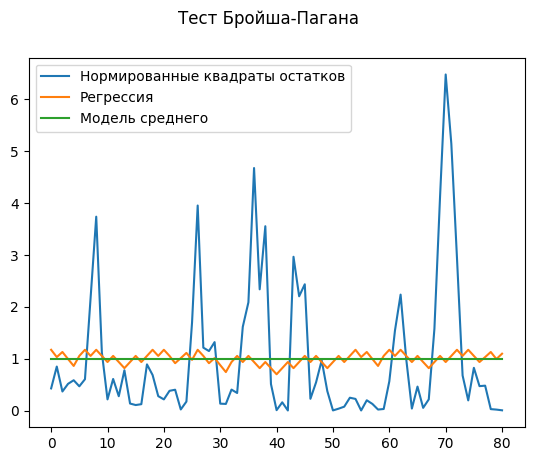

In [9]:

# Ordinary least squares
def ols_points(y, x, f) :
    X = np.array([[f[i](x[j]) for i in range(f.size)] for j in range(x.shape[0])])
    H = np.linalg.inv(X.T @ X) @ X.T
    O_estimated = H @ y
    return (X, O_estimated)

def ols(y, X) :
    H = np.linalg.inv(X.T @ X) @ X.T
    O_estimated = H @ y
    return (X, O_estimated)

# Generalized least squares 
def gls(y, X, P) :
    X_star = P @ X
    y_star = P @ y
    H = np.linalg.inv(X_star.T @ X_star) @ X_star.T
    O_estimated = H @ y_star
    resid = y_star - X_star @ O_estimated
    return (O_estimated, resid)


def breuschpagan_test(e, x, f) :
    disp_est = (e.T @ e) / e.size
    c = e**2 / disp_est
    (X_c, alpha_estimated) = ols_points(c, x, f)
    c_estimated = X_c @ alpha_estimated
    c_mean = np.mean(c)
    plt.plot(c, label="Нормированные квадраты остатков")
    plt.plot(c_estimated, label='Регрессия')
    plt.plot(np.full(c.size, c.mean()), label='Модель среднего')
    plt.suptitle('Тест Бройша-Пагана')
    plt.legend()
    ESS = (c_estimated - c_mean).T @ (c_estimated - c_mean)
    stat = ESS / 2
    pvalue = scs.chi(f.size).sf(stat)
    print(f.size)
    print(scs.chi(f.size).isf(0.05))
    #RSSn = (c - c_mean).T @ (c - c_mean)
    #RSS = (c - c_estimated).T @ (c - c_estimated)
    #fstat = ((RSSn - RSS) / (f_disp.size - 1)) / (RSS / (e.size - f.size))
    #fpvalue = scs.f(f_disp.size - 1, e.size - f_disp.size).sf(fstat)
    return (stat, pvalue)

def goldfeldquandt_test(y, x, f) -> tuple :
    n = y.size
    nc = int(n / 3)
    yl = y[0 : nc]
    yr = y[-nc:]
    
    (Xl, parl) = ols_points(yl, x[0:yl.size], f)
    (Xr, parr) = ols_points(yr, x[-yr.size:], f)
    yl_estimated = Xl @ parl 
    yr_estimated = Xr @ parr
    el = yl - yl_estimated
    er = yr - yr_estimated
    RSS1 = el.T @ el
    RSS2 = er.T @ er
    k = f.size
    stat = RSS2 / RSS1
    pvalue = scs.f((n - nc - 2 * k) / 2, (n - nc - 2 * k) / 2).sf(stat)
    return (stat, pvalue)


f = np.array([lambda x : 1, lambda x : x[0], lambda x : x[1], lambda x : x[2], lambda x : x[1] * x[3]])
f_disp = np.array([lambda x : 1, lambda x : x[0]**2, lambda x : x[1]**2, lambda x : x[2]**2, lambda x : x[3]**2])
(X, O_est) = ols_points(df['y'].to_numpy(), x, f)
y_est = X @ O_est
e = df['y'].to_numpy() - y_est

df1 = df.copy()
df1.insert(5, 'dist', df['X1']**2 + df['X2']**2 + df['X3']**2 + df['X4']**2)
df1 = df1.sort_values('dist')


import statsmodels.stats.api as sms
xx = np.array([[1, df['X1'][i]**2 + df['X2'][i]**2 + df['X3'][i]**2 + df['X4'][i]**2] for i in range(e.size)])
(bp_test_stat, bp_test_pvalue) = breuschpagan_test(e, xx, np.array([lambda x : x[0], lambda x : x[1]]))
print('Тест Бройша-Пагана\nЗначение статистики: {}\npvalue: {}\n'.format(bp_test_stat, bp_test_pvalue))
#print(sms.het_breuschpagan(e, xx))

xx1 = np.array([df1['X1'], df1['X2'], df1['X3'], df1['X4']]).T
(gf_test_stat, gf_test_pvalue) = goldfeldquandt_test(df1['y'], xx1, f)
print('Тест Голдфельда-Квандта\nЗначение статистики: {}\npvalue: {}\n'.format(gf_test_stat, gf_test_pvalue))


таким образом гипотеза о гетероскедастичности отвергается при уровне значимости 0.05

Проверка на автокорреляцию при помощи критерия Дарбина-Уотсона

0.4223673331600192


Text(0, 0.5, 'e_t')

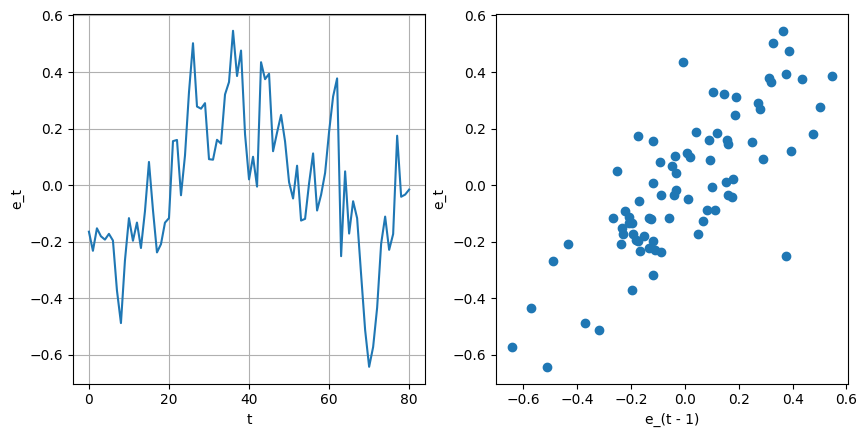

In [10]:
def darbin_watson(e) :
    e_norm = e.T @ e
    numenator = 0
    for t in range(2, e.size) :
        numenator += (e[t] - e[t - 1])**2
    return numenator / e_norm

d = darbin_watson(e)
print(d)

fig, ax = plt.subplots(1, 2)
fig.set_figwidth(10)
ax[0].plot(np.arange(e.size), e)
ax[0].grid()
ax[0].set_xlabel('t')
ax[0].set_ylabel('e_t')
#ax[0].axhline(y=0, color='black')
ax[1].scatter(e[0:e.size - 1], e[1:])
ax[1].set_xlabel('e_(t - 1)')
ax[1].set_ylabel('e_t')

$d < d_l = 1.44$, следовательно наблюдается положительная автокорреляция

Оценим коэффициент автокорреляции по процедуре Хилдрета-Лу

In [11]:

def hildrethlou_procedure(X, y, left, right) :
   RSS_list = []
   P = np.identity(n)
   for p_i in np.arange(left, right, 0.01) :
      P[0][0] = np.sqrt(1 - p_i**2)
      for i in range(P.shape[0] - 1) :
         P[i + 1][i] = -p_i
      (O_star, resid) = gls(y, X, P)
      RSS_list.append((resid.T @ resid, p_i))
   return min(RSS_list, key=lambda x : x[0])[1]

def make_P(p, sz) :
   P = np.identity(sz)
   P[0][0] = np.sqrt(1 - p**2)
   for i in range(P.shape[0] - 1) :
      P[i + 1][i] = -p
   return P

delta = 0.0001
n = y.size
X_star = X.copy()
y_star = df['y'].to_numpy()


p = hildrethlou_procedure(X, y, 0, 1.0)
print(p)

P = make_P(p, n)


0.8


Выбор наилучшей модели регрессии

In [12]:
def MallowsCp(y, y_est, RSS, p, m) -> float :
    e = y - y_est
    return (e.T @ e) / (RSS / (y.size - m)) + 2 * p - n 

def R(y, y_est) -> float :
   y_mean = y.mean()
   y_est_mean = y_est.mean()
   return ((y_est - y_est_mean).T @ (y_est - y_est_mean)) / ((y - y_mean).T @ (y - y_mean))

def F_criterion(RSS, RSSi, n, m) -> float :
    return (1 / (n - m)) * ((RSSi - RSS) / RSSi)

def reg_criterion(y_test, X_test, O_train) -> float :
    return np.linalg.norm(y_test - X_test @ O_train)**2

def symreg_criterion(y_test, y_train, X_test, X_train, O_test, O_train) -> float :
    return reg_criterion(y_test, X_test, O_train) + reg_criterion(y_train, X_train, O_test)


from sklearn.model_selection import train_test_split


x1x1 = (df['X1']**2).to_numpy()
x2x2 = (df['X2']**2).to_numpy()
x3x3 = (df['X3']**2).to_numpy()
x4x4 = (df['X4']**2).to_numpy()
x1x2 = (df['X1'] * df['X2']).to_numpy()
x1x3 = (df['X1'] * df['X3']).to_numpy()
x1x4 = (df['X1'] * df['X4']).to_numpy()
x2x3 = (df['X2'] * df['X3']).to_numpy()
x2x4 = (df['X2'] * df['X4']).to_numpy()
x3x4 = (df['X3'] * df['X4']).to_numpy()
factors = {'1' : np.ones(df.shape[0]), 'x1' : df['X1'].to_numpy(), 'x2' : df['X2'].to_numpy(), 'x3' : df['X3'].to_numpy(),
           'x4' : df['X4'].to_numpy(), 'x1x1' : x1x1, 'x2x2' : x2x2, 'x3x3' : x3x3, 'x4x4' : x4x4, 'x1x2' : x1x2, 'x1x3' : x1x3, 
           'x1x4' : x1x4, 'x2x3' : x2x3, 'x2x4' : x2x4, 'x3x4' : x3x4}
m = len(factors)

X_full = np.array([factors[key] for key in factors]).T
(O_est_full, resid_full) = gls(y, X_full, P)
RSS_full = resid_full.T @ resid_full

df_res = pd.DataFrame(columns=['i', 'Mallows', 'R', 'reg', 'symreg', 'RSS'])
# df_res['i'] = df_res['i'].astype(str)
# df_res['Mallows'] = df_res['i'].astype(float)
# df_res['R'] = df_res['i'].astype(float)
# df_res['reg'] = df_res['i'].astype(float)
# df_res['symreg'] = df_res['i'].astype(float)

preserve = ['1', 'x1', 'x2', 'x3', 'x2x4']
sweepable = [i for i in factors if i not in preserve]
factors_temp = factors.copy()
for j in range(len(sweepable) + 1) :
    X_curr = np.array([factors_temp[key] for key in factors_temp]).T
    (O_est_curr, resid_curr) = gls(y, X_curr, P)
    RSS_curr = resid_full.T @ resid_full
    y_est_curr = X_curr @ O_est_curr


    df_res.loc[j] = None
    df_res.loc[j, 'R'] = R(y, y_est_curr)

    X_a, X_b, y_a, y_b = train_test_split(X_curr, y, test_size=0.3, random_state=j)
    P_a = make_P(p, X_a.shape[0])
    P_b = make_P(p, X_b.shape[0])

    (O_est_a, resid_a) = gls(y_a, X_a, P_a)
    y_est_a = X_a @ O_est_a

    (O_est_b, resid_b) = gls(y_b, X_b, P_b)
    y_est_b = X_b @ O_est_b

    df_res.loc[j, 'reg'] = reg_criterion(y_b, X_b, O_est_a)
    df_res.loc[j, 'symreg'] = symreg_criterion(y_b, y_a, X_b, X_a, O_est_b, O_est_a)
    df_res.loc[j, 'Mallows'] = MallowsCp(y, y_est_curr, RSS_full, len(factors_temp), m)
    if j == 0 :
        df_res.loc[j, 'i'] = 'None'
    else :
        df_res.loc[j, 'i'] = i_min

    F_min = 1e9
    i_min = 0
    for i in sweepable :
        factors_temp_new = factors_temp.copy()
        factors_temp_new.pop(i)
        X_new = np.array([factors_temp_new[key] for key in factors_temp_new]).T
        (O_new, resid_new) = gls(y, X_new, P)
        F_new = F_criterion(RSS_curr, resid_new.T @ resid_new, y.size, len(factors_temp) - 1)
        if F_new < F_min :
            F_min = F_new
            i_min = i
    if len(sweepable) > 0 :
        factors_temp.pop(i_min)
        sweepable.remove(i_min)
    j += 1
    

df_res.to_csv('sweeping.csv', sep=';')




C:\Users\egorg\AppData\Local\Temp\ipykernel_14196\2353211380.py:76: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_res.loc[j, 'i'] = 'None'


Проверка адекватности модели

In [17]:
best_model = ['1', 'x1', 'x2', 'x3', 'x1x2', 'x1x4', 'x2x4']
X_best = np.array([factors[key] for key in best_model]).T
(O_best, resid_best) = gls(y, X_best, P)
print('Оценки параметров:\n', O_best)


df_tail = pd.read_csv('data.csv', sep=';').tail(6)


x1x1 = (df_tail['X1']**2).to_numpy()
x2x2 = (df_tail['X2']**2).to_numpy()
x3x3 = (df_tail['X3']**2).to_numpy()
x4x4 = (df_tail['X4']**2).to_numpy()
x1x2 = (df_tail['X1'] * df_tail['X2']).to_numpy()
x1x3 = (df_tail['X1'] * df_tail['X3']).to_numpy()
x1x4 = (df_tail['X1'] * df_tail['X4']).to_numpy()
x2x3 = (df_tail['X2'] * df_tail['X3']).to_numpy()
x2x4 = (df_tail['X2'] * df_tail['X4']).to_numpy()
x3x4 = (df_tail['X3'] * df_tail['X4']).to_numpy()
factors2 = {'1' : np.ones(df_tail.shape[0]), 'x1' : df_tail['X1'].to_numpy(), 'x2' : df_tail['X2'].to_numpy(), 'x3' : df_tail['X3'].to_numpy(),
           'x4' : df_tail['X4'].to_numpy(), 'x1x1' : x1x1, 'x2x2' : x2x2, 'x3x3' : x3x3, 'x4x4' : x4x4, 'x1x2' : x1x2, 'x1x3' : x1x3, 
           'x1x4' : x1x4, 'x2x3' : x2x3, 'x2x4' : x2x4, 'x3x4' : x3x4}


import statistics
X_best1 = np.array([factors2[key] for key in best_model]).T
y_check = X_best1 @ O_best
print(y_check)
y_test = df_tail['y'][-6:].to_numpy()
print(y_test)

disp_e = statistics.variance(y_test)
disp_est = np.linalg.norm(resid_best)**2 / (81 - len(best_model))

print('Дисперсия по первой части выборки:')
print(disp_est)
print('Оценка дисперсии по второй части выборки без использования модели:')
print(disp_e)


print('F =', disp_est / disp_e)
_f = scs.f(81 - len(best_model), 6 - 1)
print('F_0_05 =', _f.isf(0.05))
print('Достигаемый уровень значимости =', _f.sf(disp_est / disp_e))



Оценки параметров:
 [ 1.17798843  1.96849213 -0.9752294  -1.01671002 -0.12916701  0.03742069
  0.99948345]
[1.17798843 1.17798843 1.17798843 1.17798843 1.17798843 1.17798843]
[1.28 1.39 1.34 1.42 1.21 1.25]
Дисперсия по первой части выборки:
0.02256805549103932
Оценка дисперсии по второй части выборки без использования модели:
0.006749999999999996
F = 3.343415628302124
F_0_05 = 4.418982480654155
Достигаемый уровень значимости = 0.08812134221571244


### Графики остатков

Text(0, 0.5, 'e')

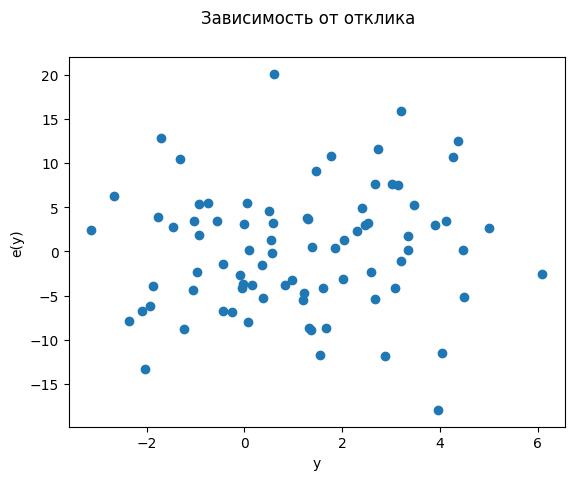

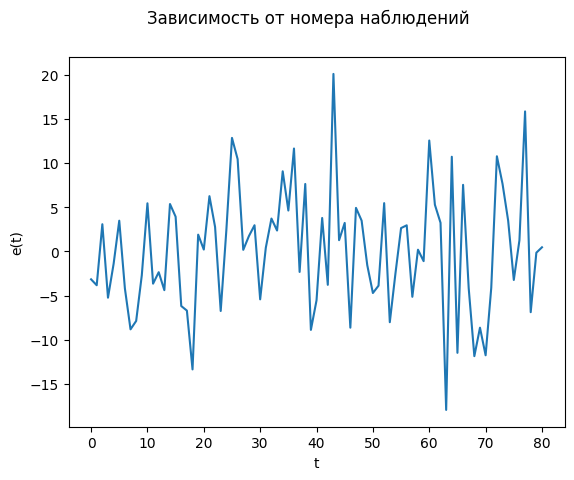

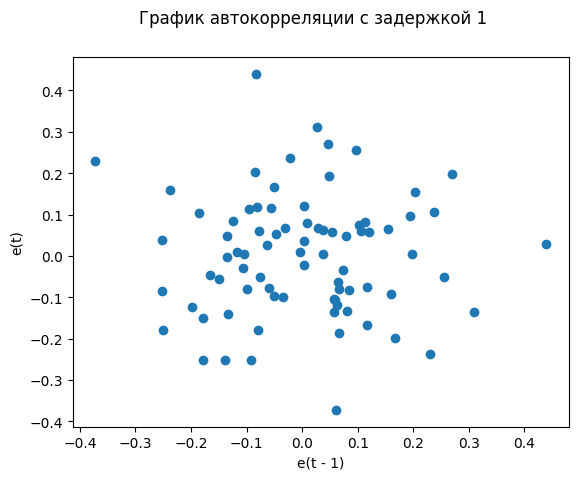

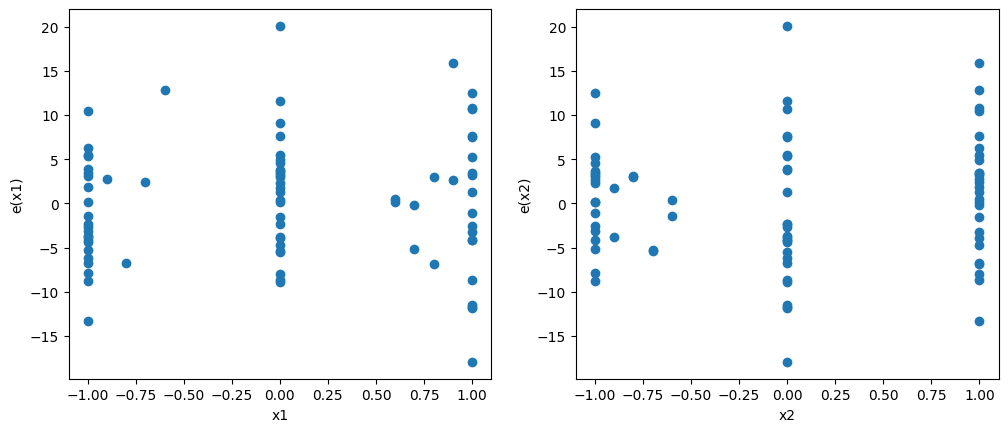

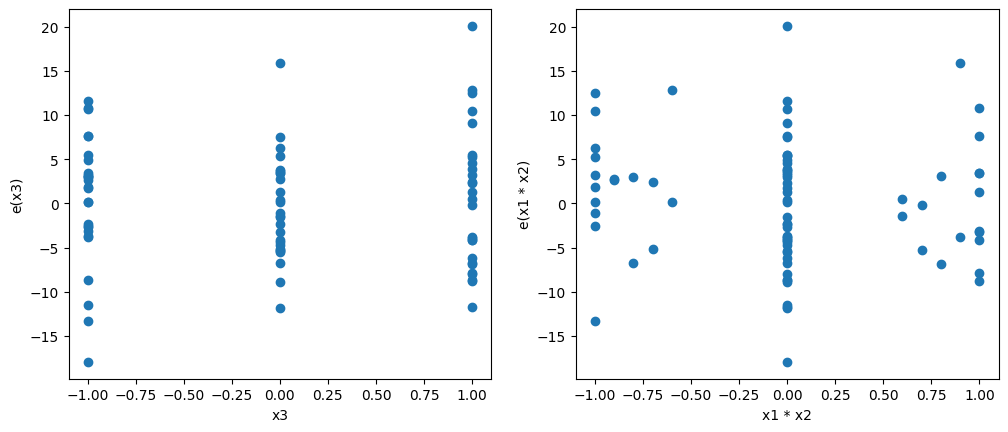

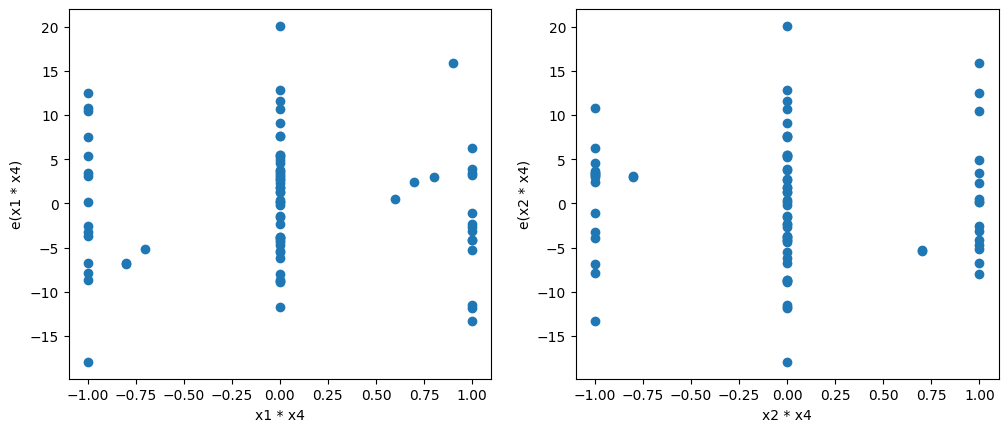

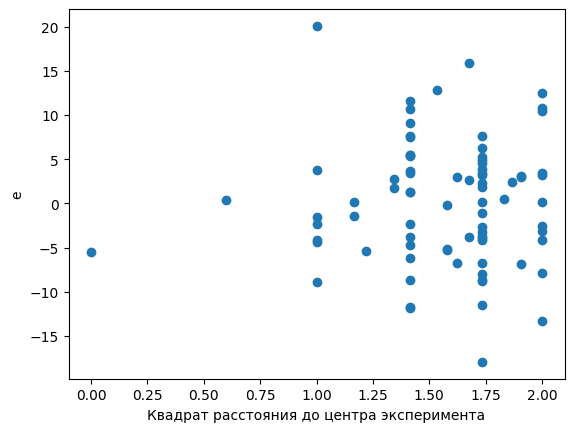

In [18]:
# Получение стандартизированных квадратов остатков
coef = (resid_best.T @ resid_best) / (81 - len(best_model))
Project_matrix = X_best @ np.linalg.inv(X_best.T @ X_best) @ X_best.T
d = resid_best / (coef * (1 - Project_matrix.diagonal()))


# Зависимость от отклика
fig, ax = plt.subplots()
fig.suptitle('Зависимость от отклика')
ax.scatter(y, d)
ax.set_xlabel('y')
ax.set_ylabel('e(y)')

# Зависимость от номера наблюдений
fig, ax = plt.subplots()
fig.suptitle('Зависимость от номера наблюдений')
ax.plot(np.arange(d.size), d)
ax.set_xlabel('t')
ax.set_ylabel('e(t)')

# График автокорреляции с задержкой 1
fig, ax = plt.subplots()
fig.suptitle('График автокорреляции с задержкой 1')
ax.scatter(resid_best[:-1], resid_best[1:])
ax.set_xlabel('e(t - 1)')
ax.set_ylabel('e(t)')

# Графики от факторов
# x1
# x2
fig, ax = plt.subplots(1, 2)
fig.set_figwidth(12)
ax[0].scatter(factors['x1'], d)
ax[0].set_xlabel('x1')
ax[0].set_ylabel('e(x1)')
ax[1].scatter(factors['x2'], d)
ax[1].set_xlabel('x2')
ax[1].set_ylabel('e(x2)')

# x3
# x1x2
fig, ax = plt.subplots(1, 2)
fig.set_figwidth(12)
ax[0].scatter(factors['x3'], d)
ax[0].set_xlabel('x3')
ax[0].set_ylabel('e(x3)')
ax[1].scatter(factors['x1x2'], d)
ax[1].set_xlabel('x1 * x2')
ax[1].set_ylabel('e(x1 * x2)')
# x1x4
# x2x4
fig, ax = plt.subplots(1, 2)
fig.set_figwidth(12)
ax[0].scatter(factors['x1x4'], d)
ax[0].set_xlabel('x1 * x4')
ax[0].set_ylabel('e(x1 * x4)')
ax[1].scatter(factors['x2x4'], d)
ax[1].set_xlabel('x2 * x4')
ax[1].set_ylabel('e(x2 * x4)')

# Зависимость от расстояния от центра наблюдений
fig, ax = plt.subplots()
distance = np.sqrt(df['X1']**2 + df['X2']**2 + df['X3']**2 + df['X4']**2)
ax.scatter(distance, d)
ax.set_xlabel('Квадрат расстояния до центра эксперимента')
ax.set_ylabel('e')


### Поиск наибольшего значения матожидания

In [19]:
def foo(x, theta) :
    res = -1 * (theta[0] + theta[1] * x[0] + theta[2] * x[1] + \
    theta[3] * x[2] + theta[4] * x[0] * x[1] + theta[5] * x[0] * x[3] \
    + theta[6] * x[1] * x[3])
    return res


from scipy.optimize import minimize
x0 = [0, 0, 0, 0]
max_point = minimize(foo, x0, args=O_best, method='nelder-mead',
     bounds=[(-1, 1), (-1, 1), (-1, 1), (-1, 1)])
print(max_point)
print(max_point.fun)

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: -6.229649754142967
             x: [ 1.000e+00 -1.000e+00 -1.000e+00 -1.000e+00]
           nit: 108
          nfev: 168
 final_simplex: (array([[ 1.000e+00, -1.000e+00, -1.000e+00, -1.000e+00],
                       [ 1.000e+00, -1.000e+00, -1.000e+00, -1.000e+00],
                       ...,
                       [ 1.000e+00, -1.000e+00, -1.000e+00, -1.000e+00],
                       [ 1.000e+00, -1.000e+00, -1.000e+00, -1.000e+00]]), array([-6.230e+00, -6.230e+00, -6.230e+00, -6.230e+00,
                       -6.230e+00]))
-6.229649754142967


### Построение доверительного интервала

In [20]:
student = scs.t(81 - len(best_model))
y_max = -max_point.fun
x_max = max_point.x
f_max = np.array([1, x_max[0], x_max[1], x_max[2], x_max[0] * x_max[1], x_max[0] * x_max[3], x_max[1] * x_max[3]])
coef = np.sqrt(disp_est * (f_max.T @ np.linalg.inv(X_best.T @ X_best) @ f_max))
print('left:', y_max - coef * student.isf(0.05 / 2))
print('right:', y_max + coef * student.isf(0.05 / 2))

left: 6.107686514596263
right: 6.351612993689671
